En esta practica trabajamos con dos tipos de bases de datos. La base de datos de criticas de vinos, y la de resultados de analisis de cancer de mama en mamografias. Las tareas a realizar son:

Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
bdvinos= pd.read_csv("C:\\Users\\carlm\\Desktop\\mineriaDeDatos\\MINERIA-DE-DATOS\\Practica2\\winemag-data_first150k.csv",index_col=0)

Para conocer el alcance total de nuestra base de datos utilizamos la funcion shape. Esta funcion muestra el total de atrubutos y items de nuestra base de datos con el formato siguiente (filas , columnas).

In [5]:
bdvinos.shape

(150930, 10)

Gracias a la funsion shape conocemos el valor total de filas y columnas de nuestra base de datos. Y sabemos que tiene 150930 filas y 10 columnas. 

Con la funsion head, podremos visualizar una tabla con todas sus atributos (columnas), pero limitamos el alcance de los datos a los primeros 10 datos de nuestra base de datos. Esto nos ayudara a conocer los tipos de datos, el contexto de los atributos.

In [6]:
bdvinos.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Con la funsion columns podremos conocer los atributos de nuestra base de datos, estoy nos ayudara a manejar con mayor facilidad los nombre que mandaremos de parametros posteriormente para generar las graficas.

In [7]:
bdvinos.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Con la funsion min obtendremos los valores minimos de los atributos numericos de nuestra base de datos. Esta informacion nos sirve para conocer entre cuales intervalos de puntuaciones y precios podemos realizar nuestro analisis.

In [8]:
bdvinos.min()

points    80.0
price      4.0
dtype: float64

En este caso la funsion min nos trea que el valor minimo de puntuacion de un vino es 80  y que el precio minimo por un vino es de 4.

Con la funsion max obtendremos los valores maximos de los atributos numericos de nuestra base de datos. Esta informacion nos sirve para conocer entre cuales intervalos de puntuaciones y precios podemos realizar nuestro analisis.

In [9]:
bdvinos.max()

points     100.0
price     2300.0
dtype: float64

En este caso la funsion max nos trea que el valor maximo de puntuacion de un vino es 100 y que el precio maximo por un vino es de 2300.0

Con la funsion dtypes obtenemos un listado de los atributos de la base de datos con el tipo de dato que tienen los datos contenidos en ella. Esto nos ayudara a identificar con mayor rapides el tipo de dato de algun atributo de interes.

In [10]:
bdvinos.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Con la funsion unique() obtenemos los valores unicos de una columna. En este caso usamos esta funsion para obtener una lista de los paises, en donde se obtubieron las muestras de los vinos. Esto nos ayuda a clasificar o a seleccionar un sujeto de interes.

In [11]:
bdvinos.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

La funcion describe() nos ofrece informacion estdatistica de un atributo numerico de nuestra base de datos. Muestran los minimos y los maximos de los atributos y infomracion de tendencia central como la media, desviasion estandar y percentiles.

In [12]:
bdvinos['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [13]:
bdvinos['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

Con el describe podemos obtener un monitor de infomracion util como la media, desviacion estandar de una columna, el valor minimo, el valor maximo, los cuartiles 25%, 75%.

Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

Supongamos que queremos obtener informacion, de cuantos vinos se estudiaron en US vs los vinos que se estudiaron en Italy. Que son en los paises en los que mas vinos se analisaron. 

In [131]:
bdvinos[bdvinos['country']=='US'].count()

country        62397
description    62397
designation    40345
points         62397
price          62139
province       62397
region_1       62261
region_2       60953
variety        62397
winery         62397
dtype: int64

In [133]:
bdvinos[bdvinos['country']=='Italy'].count()

country        23478
description    23478
designation    16890
points         23478
price          18784
province       23478
region_1       23478
region_2           0
variety        23478
winery         23478
dtype: int64

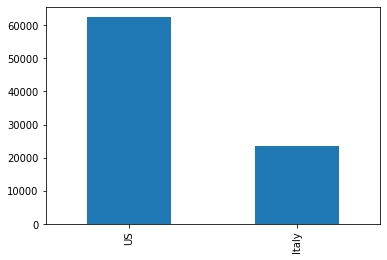

In [121]:
bdvinos['country'].value_counts().head(2).plot.bar()

Con la grafica de barras podemos comparar el numero de criticas de cada uno de los paises, esta informacion nos puede servir para obtener algun foco de interes. Saber cual es el pais con mas criticas y cual es que tiene menos. Segun nuestro interes sujeto de interes. En este caso comparamos de manera grafica la cantidad de vinos estudiados en US vs Italy. Podemos ver US tiene arriba de 60000, casi el triple de criticas que Italy que cuenta con poco mas de 20000 criticas de vinos. Esta informacion ya la sabiamos gracias a la funcion count. Pero la grafica de barras nos ayuda observar esa diferencia de mejor manera. Gracias la funcion shape sabemos que el total de criticas mundial es 150930. Por lo tanto US y Italy representan mas del 50% de los vinos analisados en este estudio.

A continuacion creamos una clase_US que contendra todos datos con relacion US  y una clase_Italy con todos los datos con relacion a Italy. Con el fin de separar la informacion de interes y hacer mas facil el analisis y la implementacion de las graficas.

In [136]:
clase_US = bdvinos[bdvinos['country']=='US']

clase_US.to_csv('US.csv', index=False)

In [137]:
clase_Italy = bdvinos[bdvinos['country']=='Italy']

clase_Italy.to_csv('Italy.csv', index=False)

Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como el puntaje de los vinos).

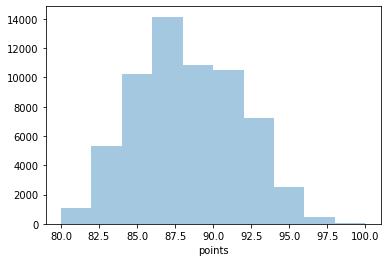

In [149]:
sns.distplot(clase_US['points'], bins=10, kde=False)

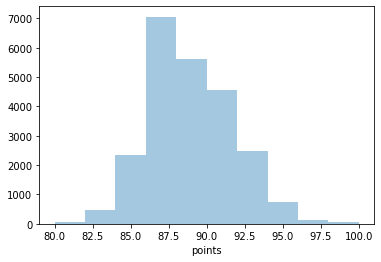

In [153]:
sns.distplot(clase_Italy['points'], bins=10, kde=False)

Los histogramas anteriories nos muestran como esntan distribuidas las calificaciones tanto US como de Italy. Podemos observar que US tiene el doble de criticas de vinos que Italia, pero Italia tiene pero como hemos visto en la garfica de barras antrior US tiene 3 veces mas criticas que Italy. Asi que podemos concluir que las 7000 criticas con promedio de 87.5 de Italy son equivalentes a las 14000 criticas con 87.5 de US.

Con la grafica Scatter plot de hexagonos permite crear diagramas de dispersión agregando los puntos en hexágonos y mostrando éstos de un color diferente en función de la densidad de puntos en cada uno de ellos. Ademas podemos agregar un indicador de color de lado izquierdo de la grafica que sirve como indicador de saturacion de puntos.

Por ejemplo, en la siguiente imagen se está representando las criticas de vinos de US en función del precio y los puntos de cada uno.

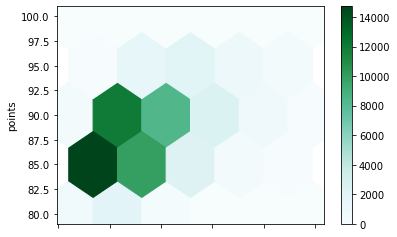

In [140]:
clase_US[clase_US['price'] < 100].plot.hexbin(x='price', y='points', gridsize=5)

Por ejemplo, en la siguiente imagen se está representando las criticas de vinos de Italy en función del precio y los puntos de cada uno.

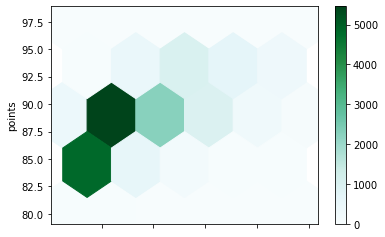

In [138]:
clase_Italy[clase_Italy['price'] < 100].plot.hexbin(x='price', y='points', gridsize=5)

En las graficas anteriores podemos ver que en US los vinos con un costo menor a 100 obtuvieron en gran medida, calificaciones de 82.5 a 87.5. Mientras que los vinos de Italy con un costo menor a 100 obtuvieron en su mayoria calificaciones de 85 a 92.5

Ahora tenemos los jointplots, que son como los scatter plots o los hexplots (graficas de coeficientes de correlacion), pero que muestran tambien histogramas de los datos en cada axis de la grafica.

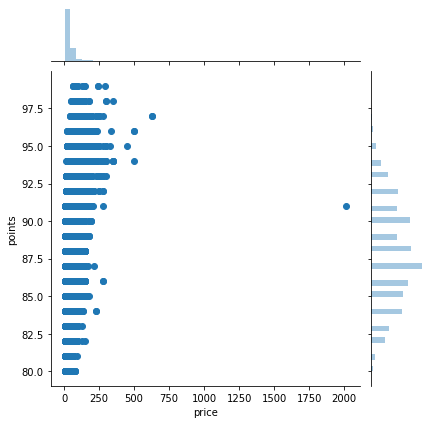

In [173]:
sns.jointplot(x='price', y='points', data=clase_US[clase_US['points'] < 100])

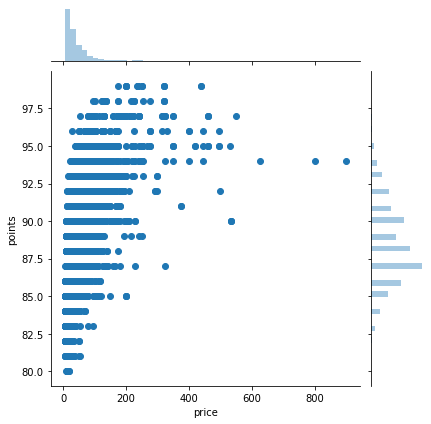

In [176]:
sns.jointplot(x='price', y='points', data=clase_Italy[clase_Italy['points'] < 100])

Con los joints podemos observar que la mayor parte de la poblacion de vinos tanto de US, como de Italy tienen un precio que osila de 0 a 800. En el caso de US existen valores atipicos que pueden llegar al precio de los 2000. Podemos ver que la distribucion de puntajes es equivalente tanto en US y Italy ya que su representacion grafica son muy parecidas. Pero su distribucion en cuanto a precios si es distinta.

Pregunta 1
Que representan los datos de la grafica de arriba?.
Es la relacion de de Vinos/puntaje, es decir, la cantidad de vinos que obtubieron cierto puntaje al ser eveluados. En este caso de el total de la base de datos.

Conclusion
En este ejemplo comparamos los puntajes y precios obtenidos en US y Italy, a pesar de que US tiene tres veces mas de criticas que Italy podemos observar en las graficas que los precios y las puntuaciones obtenidas son equivalentes.

In [184]:
clase_US['price'].describe()

count    62139.000000
mean        33.653808
std         24.891343
min          4.000000
25%         19.000000
50%         28.000000
75%         41.000000
max       2013.000000
Name: price, dtype: float64

In [182]:
clase_Italy['price'].describe()

count    18784.000000
mean        37.547913
std         37.067869
min          5.000000
25%         17.000000
50%         25.000000
75%         48.000000
max        900.000000
Name: price, dtype: float64

Como podemos observa los valores medios en cuanto al precio son muy cercanos.

In [185]:
clase_US['points'].describe()

count    62397.000000
mean        87.818789
std          3.410294
min         80.000000
25%         85.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

In [186]:
clase_Italy['points'].describe()

count    23478.000000
mean        88.413664
std          2.728914
min         80.000000
25%         87.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

Y en cuanto a puntaje los valores medios son aun mas cercanos. Como lo pudimos comprobar en las graficas.

In [13]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nltk-3.4.5                 |           py37_0         1.7 MB
    openssl-1.1.1d             |       he774522_2         4.8 MB
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  nltk                                             anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main




openssl-1.1.1d       | 4.8 MB    |            |   0% 
openssl-1.1.1d       | 4.8 MB    |            |   0% 
openssl-1.1.1d       | 4.8 MB    | 4          |   4% 
openssl-1.1.1d       | 4.8 MB    | 6          |   6% 
opens


InvalidArchiveError('Error with archive C:\\ProgramData\\Anaconda3\\pkgs\\openssl-1.1.1d-he774522_2cx3zj1rq\\pkg-openssl-1.1.1d-he774522_2.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')



In [14]:
import nltk
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('rev-solo.csv', header = None)

In [15]:
pr = pd.read_csv("C:\\Users\\carlm\\Desktop\\mineriaDeDatos\\MINERIA-DE-DATOS\\Practica2\\rev-solo.csv")
pr.head(10)

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
0,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
1,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
2,Pineapple rind lemon pith and orange blossom s...,US,Riesling
3,Much like the regular bottling from 2012 this ...,US,Pinot Noir
4,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot
5,Here's a bright informal red that opens with a...,Italy,Frappato
6,This dry and restrained wine offers spice in p...,France,Gewürztraminer
7,Savory dried thyme notes accent sunnier flavor...,Germany,Gewürztraminer
8,This has great depth of flavor with its fresh ...,France,Pinot Gris
9,Soft supple plum envelopes an oaky structure i...,US,Cabernet Sauvignon


In [16]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\carlm/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\carlm\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
